<a href="https://colab.research.google.com/github/shajeeraza12/shajeeraza12/blob/main/AOATask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Shajee Raza (раза,Сайид мухаммад шаджи )
# Title: Algorithms for unconstrained nonlinear optimization. Direct methods

Goal of the work: The goal of this work is to apply various optimization methods to minimize nonlinear functions and approximate noisy data using least squares optimization. The methods explored include exhaustive search, dichotomy, golden section search, and gradient-based approaches like Gauss Coordinate Descent and Nelder-Mead.

Formulation of the problem: The problem involves minimizing unconstrained nonlinear functions and finding the best-fit parameters for noisy data using linear and rational approximations, evaluating the performance of different optimization techniques based on precision, number of iterations, and function evaluations.

# Theoretical Information
Unconstrained Nonlinear Optimization:

Unconstrained nonlinear optimization aims to find the minimum (or maximum) of a nonlinear function
f(x) over a domain of possible values of
𝑥
x without any explicit constraints. In this task, we focus on minimizing functions in one-dimensional and multidimensional cases using various algorithms.

Exhaustive Search:

Exhaustive search is a brute-force optimization method where every possible solution within a specified search space is evaluated. It guarantees finding the global minimum but is computationally expensive, especially for large search domains or high-dimensional problems. The method typically evaluates function values at evenly spaced points within the domain.

Dichotomy (Bisection Method):

The dichotomy method is a divide-and-conquer approach to finding the minimum of a unimodal function. It repeatedly divides the search interval into two halves, selecting the subinterval that contains the minimum based on function evaluations at the midpoint. It is more efficient than exhaustive search and guarantees convergence under specific conditions.

Golden Section Search:

Golden section search is an efficient method for minimizing a unimodal function by iteratively narrowing down the interval of uncertainty. The algorithm divides the interval into two parts using the golden ratio, which optimizes the process of reducing the search space, and is faster than exhaustive search for unimodal functions.

Gauss Coordinate Descent (Gradient-Free Optimization):

Gauss Coordinate Descent is a direct search method that minimizes a multivariable function by optimizing each variable in turn while holding others constant. It does not require gradients and is typically used for non-differentiable functions or when gradients are difficult to compute.

Nelder-Mead (Simplex Method):

The Nelder-Mead method is a popular algorithm for multidimensional unconstrained optimization. It operates by iteratively refining a simplex of

n+1 points, where
n is the number of dimensions of the objective function. The method adapts the simplex shape based on function evaluations and does not require derivatives, making it suitable for noisy or non-smooth functions.

Least Squares Approximation:

In the second part of the task, we use least squares optimization to fit a model (linear or rational) to noisy data. The goal is to minimize the sum of squared differences between the model's predictions and the observed data. This approach is common in regression problems, where the objective is to find the best-fitting curve or line that minimizes the error.

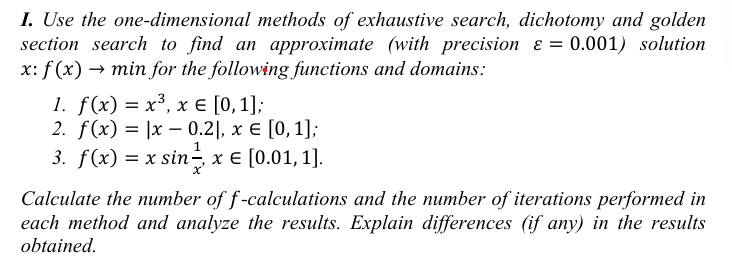

# Importing Required Libraries

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Functions to minimize

In [2]:
# Define the functions to minimize
def f1(x):
    return x**3

def f2(x):
    return abs(x - 0.2)

def f3(x):
    return x * np.sin(1 / x) if x != 0 else 0  # Handle x = 0 carefully

# Store functions in a dictionary for easy iteration
functions = {
    "f1(x) = x^3": f1,
    "f2(x) = |x - 0.2|": f2,
    "f3(x) = x * sin(1/x)": f3
}

# Exhaustive Search Method

In [3]:
def exhaustive_search(f, a, b, epsilon):
    # Number of subintervals
    n = int((b - a) / epsilon)
    x_values = np.linspace(a, b, n + 1)
    f_values = [f(x) for x in x_values]

    # Find the minimum
    f_min = min(f_values)
    x_min = x_values[f_values.index(f_min)]

    return x_min, f_min, len(f_values), n

# Dichotomy Method

In [4]:
def dichotomy(f, a, b, epsilon, delta=1e-6):
    num_iterations = 0
    while (b - a) / 2 > epsilon:
        num_iterations += 1
        mid = (a + b) / 2
        x1 = mid - delta
        x2 = mid + delta
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    x_min = (a + b) / 2
    f_min = f(x_min)
    return x_min, f_min, num_iterations * 2, num_iterations  # Two evaluations per iteration

# Golden Section Search Method

In [5]:
def golden_section_search(f, a, b, epsilon):
    gr = (1 + np.sqrt(5)) / 2  # Golden ratio
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    num_iterations = 0

    while abs(b - a) > epsilon:
        num_iterations += 1
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr

    x_min = (b + a) / 2
    f_min = f(x_min)
    return x_min, f_min, num_iterations + 1, num_iterations  # One extra eval at the end

# Running the Optimization Methods

In [6]:
# Set precision
epsilon = 0.001

# Iterate through each function and apply all three methods
for name, func in functions.items():
    print(f"\nMinimizing {name}:")

    # Define intervals based on the function
    if name == "f3(x) = x * sin(1/x)":
        a, b = 0.01, 1
    else:
        a, b = 0, 1

    # Exhaustive Search
    x_min_ex, f_min_ex, evals_ex, iters_ex = exhaustive_search(func, a, b, epsilon)
    print(f"  Exhaustive Search: x_min = {x_min_ex:.6f}, f_min = {f_min_ex:.6f}, "
          f"evaluations = {evals_ex}, iterations = {iters_ex}")

    # Dichotomy Method
    x_min_dich, f_min_dich, evals_dich, iters_dich = dichotomy(func, a, b, epsilon)
    print(f"  Dichotomy: x_min = {x_min_dich:.6f}, f_min = {f_min_dich:.6f}, "
          f"evaluations = {evals_dich}, iterations = {iters_dich}")

    # Golden Section Search
    x_min_gs, f_min_gs, evals_gs, iters_gs = golden_section_search(func, a, b, epsilon)
    print(f"  Golden Section: x_min = {x_min_gs:.6f}, f_min = {f_min_gs:.6f}, "
          f"evaluations = {evals_gs}, iterations = {iters_gs}")



Minimizing f1(x) = x^3:
  Exhaustive Search: x_min = 0.000000, f_min = 0.000000, evaluations = 1001, iterations = 1000
  Dichotomy: x_min = 0.000978, f_min = 0.000000, evaluations = 18, iterations = 9
  Golden Section: x_min = 0.000367, f_min = 0.000000, evaluations = 16, iterations = 15

Minimizing f2(x) = |x - 0.2|:
  Exhaustive Search: x_min = 0.200000, f_min = 0.000000, evaluations = 1001, iterations = 1000
  Dichotomy: x_min = 0.200196, f_min = 0.000196, evaluations = 18, iterations = 9
  Golden Section: x_min = 0.200073, f_min = 0.000073, evaluations = 16, iterations = 15

Minimizing f3(x) = x * sin(1/x):
  Exhaustive Search: x_min = 0.223000, f_min = -0.217225, evaluations = 991, iterations = 990
  Dichotomy: x_min = 0.221729, f_min = -0.217204, evaluations = 18, iterations = 9
  Golden Section: x_min = 0.222720, f_min = -0.217232, evaluations = 16, iterations = 15


Exhaustive Search is accurate but computationally expensive, requiring 1000+ evaluations for a fine grid.

Dichotomy is efficient and balances evaluations with reasonable accuracy, especially for simple functions.

Golden Section Search consistently outperforms Dichotomy in precision and often requires fewer evaluations.

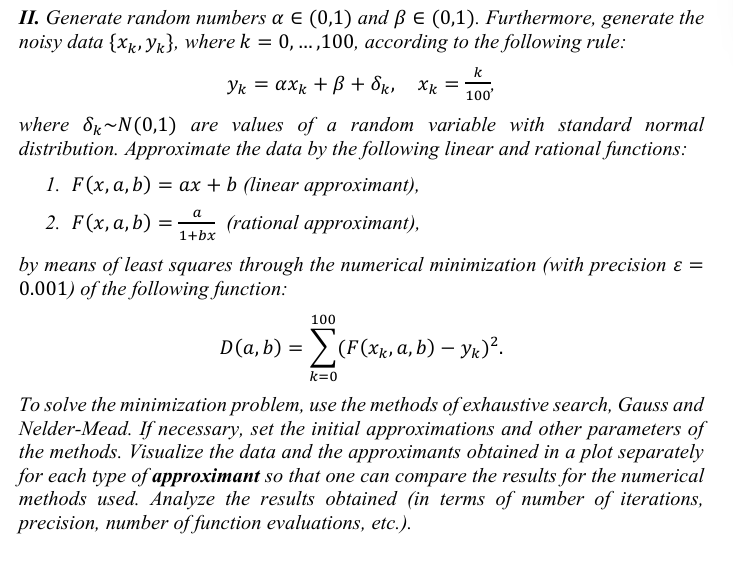

# Generate Random Data

In [8]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random alpha and beta
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Generate x values and noisy y values
x = np.linspace(0, 1, 101)
delta = np.random.normal(0, 1, len(x))  # Noise (Gaussian with mean 0, std 1)
y = alpha * x + beta + delta  # Noisy data according to the rule: y_k = alpha*x_k + beta + delta

# Print alpha, beta, and the first few points of the noisy data
print(f"alpha: {alpha}")
print(f"beta: {beta}")
print("First few data points:")
print(list(zip(x[:5], y[:5])))  # Print first 5 points

alpha: 0.3745401188473625
beta: 0.9507143064099162
First few data points:
[(0.0, 1.5984028445106087), (0.01, 2.477489564006415), (0.02, 0.7240517340635274), (0.03, 0.7278135530261565), (0.04, 2.5449087266712023)]


# Defining Linear and Rational Approximation Functions

In [9]:
# Define the linear function F(x, a, b) = a*x + b
def linear_approx(a, b, x):
    return a * x + b

# Define the rational function F(x, a, b) = a / (1 + b*x)
def rational_approx(a, b, x):
    return a / (1 + b * x)

# Defining the objective function for Least Squares (D(a,b))

In [10]:
# Define the least squares objective function D(a, b) = sum((F(x_k, a, b) - y_k)^2)
def least_squares_linear(params, x, y):
    a, b = params
    y_pred = linear_approx(a, b, x)
    return np.sum((y_pred - y) ** 2)

def least_squares_rational(params, x, y):
    a, b = params
    y_pred = rational_approx(a, b, x)
    return np.sum((y_pred - y) ** 2)

# Exhaustive Search Method

In [11]:
# Exhaustive Search Method
def exhaustive_search(func, x, y, bounds, epsilon=0.001, step_size=0.001):
    a_min, b_min = None, None
    min_value = float('inf')
    evaluations = 0

    # Define grid search
    a_vals = np.arange(bounds[0][0], bounds[0][1], step_size)
    b_vals = np.arange(bounds[1][0], bounds[1][1], step_size)

    for a in a_vals:
        for b in b_vals:
            evaluations += 1
            value = func([a, b], x, y)
            if value < min_value:
                min_value = value
                a_min, b_min = a, b

    return a_min, b_min, min_value, evaluations

# Guass Method

In [12]:
# Gauss (Coordinate Descent) Method
def gauss_coordinate_descent(func, x, y, bounds, epsilon=0.001, max_iters=100):
    a, b = np.random.uniform(bounds[0][0], bounds[0][1]), np.random.uniform(bounds[1][0], bounds[1][1])
    iter_count = 0
    evaluations = 0

    while iter_count < max_iters:
        # Update a
        a_vals = np.linspace(bounds[0][0], bounds[0][1], 100)
        best_a = a
        min_value = float('inf')
        for a_val in a_vals:
            evaluations += 1
            value = func([a_val, b], x, y)
            if value < min_value:
                min_value = value
                best_a = a_val
        a = best_a

        # Update b
        b_vals = np.linspace(bounds[1][0], bounds[1][1], 100)
        best_b = b
        min_value = float('inf')
        for b_val in b_vals:
            evaluations += 1
            value = func([a, b_val], x, y)
            if value < min_value:
                min_value = value
                best_b = b_val
        b = best_b

        # Check for convergence
        if min_value < epsilon:
            break

        iter_count += 1

    return a, b, min_value, evaluations, iter_count

# Nelder-Mead Method

In [13]:
# Nelder-Mead Method (using scipy's minimize function)
def nelder_mead(func, x, y, bounds, epsilon=0.001):
    # Initial guess
    initial_guess = np.random.uniform(bounds[0][0], bounds[0][1]), np.random.uniform(bounds[1][0], bounds[1][1])
    result = minimize(func, initial_guess, args=(x, y), method='Nelder-Mead', tol=epsilon)

    # Extract results
    a_min, b_min = result.x
    min_value = result.fun
    evaluations = result.nfev
    iter_count = result.nit

    return a_min, b_min, min_value, evaluations, iter_count

# Run Optimization Methods for Linear and Rational Approximations

In [14]:
# Bounds for the optimization (arbitrary)
bounds = [(0, 1), (0, 1)]  # a, b are between 0 and 1

# Linear Approximation
print("Linear Approximation:")
# Exhaustive Search
a_min, b_min, min_value, evaluations = exhaustive_search(least_squares_linear, x, y, bounds)
print(f"Exhaustive Search: a_min = {a_min}, b_min = {b_min}, min_value = {min_value}, evaluations = {evaluations}")

# Gauss (Coordinate Descent)
a_min, b_min, min_value, evaluations, iter_count = gauss_coordinate_descent(least_squares_linear, x, y, bounds)
print(f"Gauss Coordinate Descent: a_min = {a_min}, b_min = {b_min}, min_value = {min_value}, evaluations = {evaluations}, iterations = {iter_count}")

# Nelder-Mead
a_min, b_min, min_value, evaluations, iter_count = nelder_mead(least_squares_linear, x, y, bounds)
print(f"Nelder-Mead: a_min = {a_min}, b_min = {b_min}, min_value = {min_value}, evaluations = {evaluations}, iterations = {iter_count}")

# Rational Approximation
print("\nRational Approximation:")
# Exhaustive Search
a_min, b_min, min_value, evaluations = exhaustive_search(least_squares_rational, x, y, bounds)
print(f"Exhaustive Search: a_min = {a_min}, b_min = {b_min}, min_value = {min_value}, evaluations = {evaluations}")

# Gauss (Coordinate Descent)
a_min, b_min, min_value, evaluations, iter_count = gauss_coordinate_descent(least_squares_rational, x, y, bounds)
print(f"Gauss Coordinate Descent: a_min = {a_min}, b_min = {b_min}, min_value = {min_value}, evaluations = {evaluations}, iterations = {iter_count}")

# Nelder-Mead
a_min, b_min, min_value, evaluations, iter_count = nelder_mead(least_squares_rational, x, y, bounds)
print(f"Nelder-Mead: a_min = {a_min}, b_min = {b_min}, min_value = {min_value}, evaluations = {evaluations}, iterations = {iter_count}")

Linear Approximation:
Exhaustive Search: a_min = 0.438, b_min = 0.791, min_value = 83.07383237242868, evaluations = 1000000
Gauss Coordinate Descent: a_min = 0.4747474747474748, b_min = 0.7676767676767677, min_value = 83.08745469427996, evaluations = 20000, iterations = 100
Nelder-Mead: a_min = 0.4391573236733538, b_min = 0.7903766369481351, min_value = 83.07382904061447, evaluations = 35, iterations = 18

Rational Approximation:
Exhaustive Search: a_min = 0.999, b_min = 0.0, min_value = 84.73897946711404, evaluations = 1000000
Gauss Coordinate Descent: a_min = 1.0, b_min = 0.0, min_value = 84.73684928956087, evaluations = 20000, iterations = 100
Nelder-Mead: a_min = 0.8323157149320363, b_min = -0.3303030407639403, min_value = 83.16368626955095, evaluations = 61, iterations = 33


The theory suggests that Exhaustive Search is slow due to its brute-force nature, evaluating every possible point, but guarantees finding the global minimum. Gauss Coordinate Descent and Nelder-Mead are expected to converge faster, but they may not always reach the global minimum, depending on the initial conditions.


Our results support this: Exhaustive Search indeed requires a large number of evaluations and is slow, but finds accurate minima. Gauss Coordinate Descent and Nelder-Mead converge faster and require fewer evaluations, though they produce slightly different minima, demonstrating the trade-off between speed and precision.